Her skal vi lage en modell som på bakgrunn av ulike morfometriske cerebrale strukturer skal angi hvilken aldersgruppe hvert individ hører til, altså foreslå personens aldergruppe på bakgrunn av størrelsen på hjernens anatomiske strukturer.

# Setup og datainnlatning

In [0]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('https://github.com/MMIV-ML/ELMED219x/raw/master/data/project/train.csv')
test = pd.read_csv('https://github.com/MMIV-ML/ELMED219x/raw/master/data/project/test.csv')
sampleSubmission = pd.read_csv('https://github.com/MMIV-ML/ELMED219x/raw/master/data/project/sampleSubmission.csv')
demography = pd.read_csv('https://github.com/MMIV-ML/ELMED219x/raw/master/data/project/demography.csv')

# Hva finnes i filene?

## Datasett, trening
De første 5 linjene ser slik ut:

In [0]:
train.head()

,IXI_ID,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,...,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,BrainSegVolNotVent,eTIV_y,AGE_GROUP
0,192,0,11111.5,331.0,11795.1,48149.3,6439.0,3088.3,4606.8,1649.9,...,12093.0,11443.0,9684.0,1127.0,2677.0,971.0,7527.0,1038272.0,1.428096e+06,1
1,380,0,7563.9,218.2,13404.7,50780.6,6066.0,2968.8,3907.7,2012.7,...,10072.0,10857.0,8617.0,929.0,2193.0,744.0,5644.0,997010.0,1.379130e+06,2
2,363,0,12209.3,215.3,12529.0,49778.5,6983.4,2867.0,3651.0,1615.6,...,10066.0,9829.0,8060.0,1027.0,1846.0,590.0,5985.0,961297.0,1.407561e+06,2
3,544,0,6339.2,179.6,16834.6,42331.6,7076.6,2872.1,2928.2,1806.6,...,10048.0,11579.0,7937.0,793.0,2549.0,822.0,6641.0,946245.0,1.301911e+06,2
4,166,0,3663.6,195.5,12412.9,49665.2,6986.4,3124.3,4325.6,1840.5,...,11176.0,11947.0,9539.0,1252.0,2578.0,949.0,6346.0,1015920.0,1.230259e+06,1


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Columns: 141 entries, IXI_ID to AGE_GROUP
dtypes: float64(138), int64(3)
memory usage: 361.4 KB


## Datasett, test
Slik ser test.csv ut. Merker oss at feature'en 'AGE_GROUP' mangler og antall kolonner i testsettet er derfor bare 140 

In [0]:
test.head()

,IXI_ID,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,...,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,BrainSegVolNotVent,eTIV_y
0,195,0,10539.6,179.5,21565.2,55995.4,10076.1,3368.1,5049.0,2186.8,...,26082.0,13102.0,13287.0,10999.0,1314.0,2695.0,916.0,8080.0,1330993.0,1.796701e+06
1,437,0,7934.2,67.0,17643.0,61900.5,6703.4,2859.9,4023.3,1804.2,...,17235.0,10405.0,10887.0,9297.0,921.0,2151.0,737.0,5859.0,1077120.0,1.528699e+06
2,278,0,3867.5,152.3,17218.8,68372.1,9886.3,3398.7,5372.3,2637.6,...,27369.0,14082.0,15206.0,12410.0,926.0,2225.0,939.0,8266.0,1321759.0,1.842491e+06
3,236,0,14641.5,388.6,16929.3,56363.7,9119.1,3651.7,5583.3,2332.2,...,23856.0,12845.0,11200.0,12732.0,1050.0,2415.0,1056.0,7435.0,1250661.0,1.676105e+06
4,250,0,10396.7,427.3,16073.2,48747.5,6637.4,3136.6,4102.0,2161.1,...,18983.0,11023.0,10563.0,9131.0,820.0,2370.0,843.0,6818.0,1110722.0,1.579444e+06


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 140 entries, IXI_ID to eTIV_y
dtypes: float64(138), int64(2)
memory usage: 154.3 KB


## Datasett, demografi (metadata)

In [0]:
demography

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.80
1,12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.78
2,13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.71
3,14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.24
4,15,1,181,90,2,1,6,5,1981-03-11,1,2005-06-23,24.28
5,16,1,172,63,1,2,1,5,1950-04-24,1,2005-06-24,55.17
6,17,2,178,72,1,3,1,5,1976-05-21,1,2005-06-24,29.09
7,19,1,180,88,1,2,1,4,1946-11-02,1,2005-06-30,58.66
8,20,1,178,72,1,2,1,4,1966-01-05,1,2005-06-24,39.47
9,21,2,165,64,1,1,3,3,1983-12-06,1,2005-06-30,21.57


In [0]:
demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 12 columns):
IXI_ID               469 non-null int64
SEX_ID (1=m, 2=f)    469 non-null int64
HEIGHT               469 non-null int64
WEIGHT               469 non-null int64
ETHNIC_ID            469 non-null int64
MARITAL_ID           469 non-null int64
OCCUPATION_ID        469 non-null int64
QUALIFICATION_ID     469 non-null int64
DOB                  469 non-null object
DATE_AVAILABLE       469 non-null int64
STUDY_DATE           469 non-null object
AGE                  469 non-null float64
dtypes: float64(1), int64(9), object(2)
memory usage: 44.0+ KB


## Datasett, merged
Lager et nytt datasett med metadataene og treningsdata. Med dette datasettet kan vi f.eks. se på sammenhenger mellom kjønn og ventrikkelstørrelse, hvor veriene for disse er hentet fra hhv. demography og train.

In [0]:
merged = pd.merge(demography, train, on='IXI_ID')
merged.head()

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,...,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,BrainSegVolNotVent,eTIV_y,AGE_GROUP
0,2,2,164,58,1,4,1,5,1970-01-30,1,...,13281.0,10730.0,9077.0,1049.0,2394.0,770.0,7277.0,1147266.0,1.545768e+06,0
1,12,1,175,70,1,2,1,5,1966-08-20,1,...,13707.0,13103.0,12594.0,1109.0,2496.0,857.0,8235.0,1323241.0,1.852688e+06,1
2,19,1,180,88,1,2,1,4,1946-11-02,1,...,11963.0,13352.0,11118.0,1212.0,3346.0,1070.0,7848.0,1214350.0,1.599052e+06,2
3,20,1,178,72,1,2,1,4,1966-01-05,1,...,14005.0,10488.0,11009.0,840.0,2956.0,869.0,7214.0,1249623.0,1.702720e+06,1
4,21,2,165,64,1,1,3,3,1983-12-06,1,...,14293.0,14062.0,10353.0,1126.0,2778.0,992.0,7134.0,1259980.0,1.715708e+06,0


## Observasjoner hittil
Vi ser at `train` er treningssettet med lablede data, `test` er testsettet uten lablede data og `demography` er metadata. 

De ulike features i datasettene er de uavhengige variablene, eller predictor variabler. Avhengig variabel (target) er "Age Group".

`merged` vil vi bruke til å visualisere ulike sammenhenger i treningssettet. 

Vi bruker supervised learning ved at modellen benytter de lablede variablene i treningssettet til å finne hvilke features som best angir target i testsettet.

## Plots og videre utforskning

Her visualiserer vi noen sammenhenger fra datasettet 'merged'. 

Hva er kjønnsfordelingen i datasettet?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


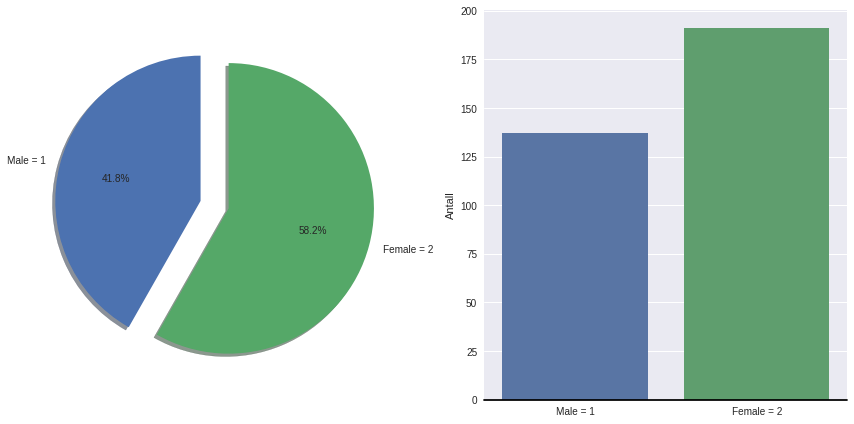

In [0]:
_, counts = np.unique(merged['SEX_ID (1=m, 2=f)'], return_counts=True)
labels = ['Male = 1', 'Female = 2']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Pie chart:
ax1.pie(counts, explode=[0.1, 0.1], labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)

# Bar plot:
sns.barplot(x=labels, y=counts, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Antall")
sns.despine(bottom=True)

# Vis plots
plt.tight_layout(h_pad=2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


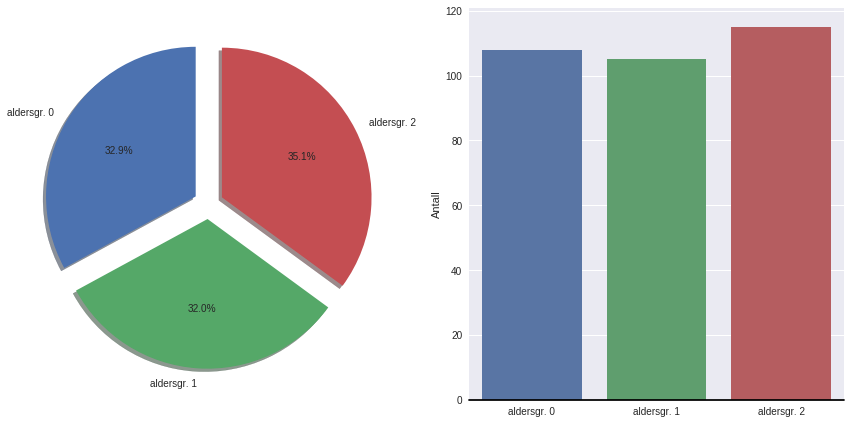

In [0]:
_, counts = np.unique(train['AGE_GROUP'], return_counts=True)
labels = ['aldersgr. 0', 'aldersgr. 1', 'aldersgr. 2']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Pie chart:
ax1.pie(counts, explode=[0.1, 0.1, 0.1], labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)

# Bar plot:
sns.barplot(x=labels, y=counts, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Antall")
sns.despine(bottom=True)

# Vis plots
plt.tight_layout(h_pad=2)

Hvordan er variasjonen av totalt hjernevolum som funksjon av kjønn?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


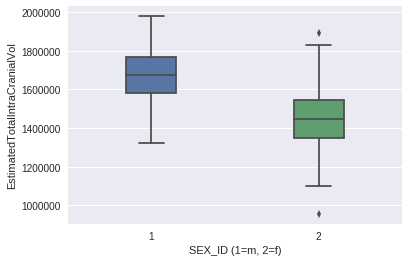

In [0]:
sns.boxplot(x='SEX_ID (1=m, 2=f)', y='EstimatedTotalIntraCranialVol', data=merged, width=0.3)

In [0]:
names = ['rh_insula_volume', 'lh_insula_volume', 'rh_superiorparietal_volume', 'Left-Hippocampus', 'Left-Amygdala', 'CSF', 'Left-Lateral-Ventricle', 'Left-Putamen', 'EstimatedTotalIntraCranialVol']


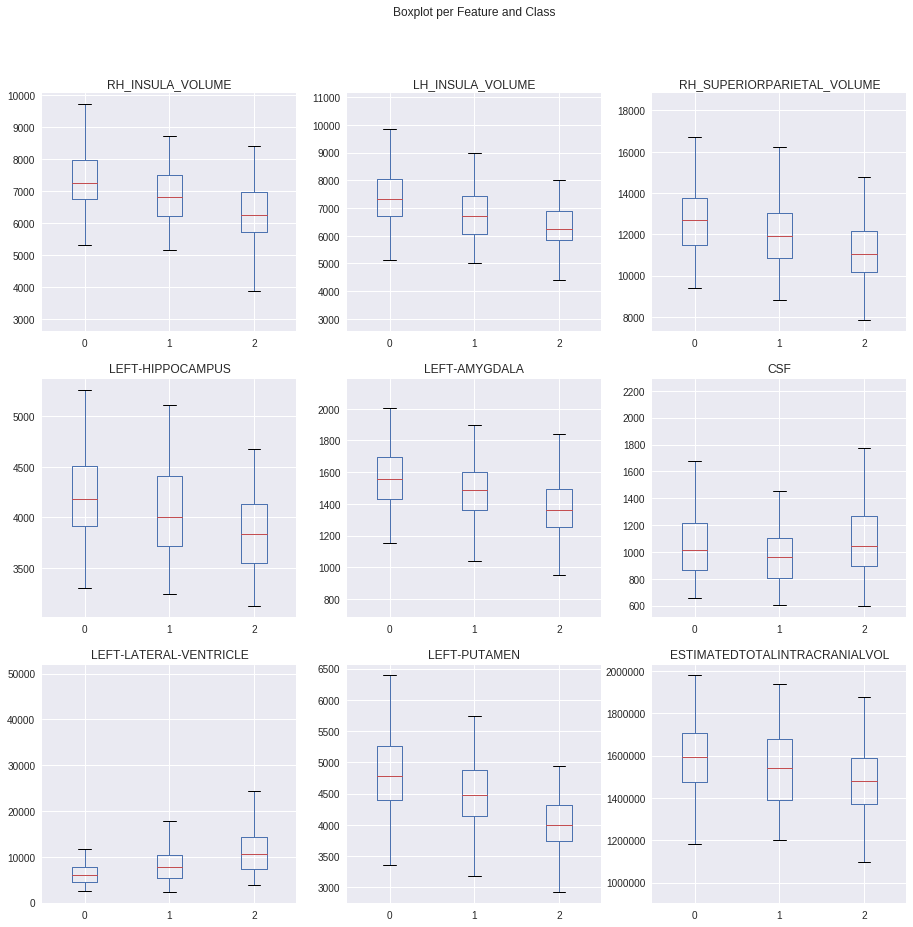

In [0]:
%matplotlib inline

fig, axes = plt.subplots(3,3, figsize=(15,15))
ax = axes.ravel()
for k, ch in enumerate(names):
    merged.boxplot(column=[ch], by='AGE_GROUP', ax=ax[k])
    ax[k].set_title(ch.upper())
    ax[k].set(xlabel="")
plt.suptitle("Boxplot per Feature and Class")    
plt.show()

In [0]:
col_names =  ['tot_insula_volume', 'tot_superiorparietal_volume', 'Tot-Hippocampus', 'Tot-Amygdala', 'Tot-Lateral-Ventricle', 'Tot-Putamen']
df_total = pd.DataFrame(columns = col_names)

for i in range(0, len(merged)): 
    df_total.loc[i] = [merged['rh_insula_volume'][i] + merged['lh_insula_volume'][i], 
                       merged['rh_superiorparietal_volume'][i] + merged['rh_superiorparietal_volume'][i], 
                       merged['Right-Hippocampus'][i] + merged['Left-Hippocampus'][i],
                       merged['Right-Amygdala'][i] + merged['Left-Amygdala'][i],
                       merged['Right-Lateral-Ventricle'][i] + merged['Left-Lateral-Ventricle'][i],
                       merged['Right-Putamen'][i] + merged['Left-Putamen'][i]
                      ]   
df_total.head()

,tot_insula_volume,tot_superiorparietal_volume,Tot-Hippocampus,Tot-Amygdala,Tot-Lateral-Ventricle,Tot-Putamen
0,14203.0,26562.0,7767.0,3004.0,8548.3,9848.1
1,15809.0,27414.0,9646.9,4023.7,15973.1,9814.2
2,15089.0,23926.0,9103.5,3423.3,25009.2,6780.2
3,14547.0,28010.0,9216.4,4107.9,16928.9,11124.1
4,14539.0,28586.0,8426.8,3850.5,19592.2,9351.4


In [0]:
merged_exp = pd.concat([merged, df_total], axis=1)

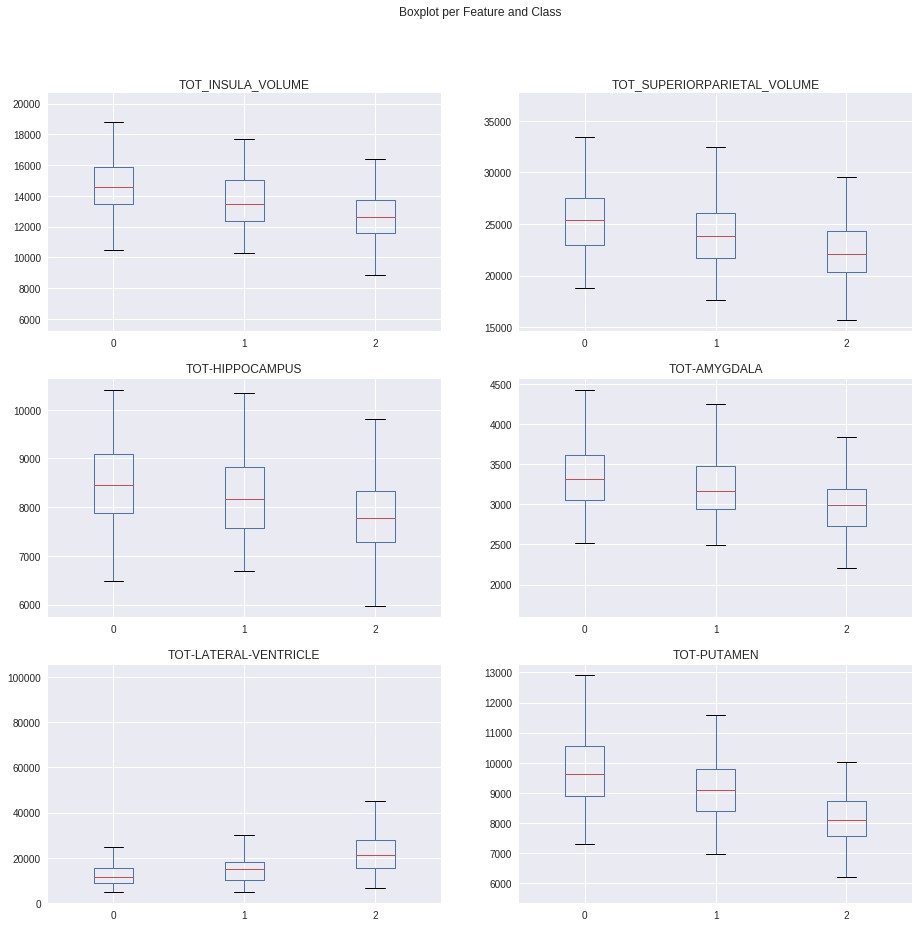

In [0]:
%matplotlib inline

fig, axes = plt.subplots(3,2, figsize=(15,15))
ax = axes.ravel()
for k, ch in enumerate(col_names):
    merged_exp.boxplot(column=[ch], by='AGE_GROUP', ax=ax[k])
    ax[k].set_title(ch.upper())
    ax[k].set(xlabel="")
plt.suptitle("Boxplot per Feature and Class")    
plt.show()

# Hvilken prediksjonsmodell skal vi bruke?

Vi angriper det som et klassifikasjonsproblem: 
>Er personen i aldersgruppe 0, 1 eller 2?

## Random forests, vanlig

In [0]:
X = train.drop(['AGE_GROUP'],axis=1)
y = train['AGE_GROUP']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [0]:
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_val)

0.6585365853658537

Kjører cross-validation

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print(scores)
print(scores.mean())

[0.71212121 0.62121212 0.66666667 0.72307692 0.6       ]
0.6646153846153846


In [0]:
y_pred_rf = rf.predict(test)
submission_rf = pd.DataFrame({'IXI_IDX': test['IXI_ID'], 'label': y_pred_rf})
submission_rf.to_csv('submission_rf.csv', index=False)

## Linear model

In [0]:
from sklearn import linear_model

lm_clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
lm_clf.fit(X_train,y_train)

lm_clf.score(X_val, y_val)

0.4024390243902439

## DNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from keras.utils.np_utils import to_categorical
#X_train.shape

np.random.seed(7)
Y_train = to_categorical(y_train, 3)
Y_test = to_categorical(y_val, 3)

In [0]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=140, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=5, batch_size=5)

Epoch 1/5
246/246 [==============================] - 0s 1ms/step - loss: 5.4303 - acc: 0.6612
Epoch 2/5
246/246 [==============================] - 0s 267us/step - loss: 5.4303 - acc: 0.6612
Epoch 3/5
246/246 [==============================] - 0s 269us/step - loss: 5.4303 - acc: 0.6612
Epoch 4/5
246/246 [==============================] - 0s 285us/step - loss: 5.4303 - acc: 0.6612
Epoch 5/5
246/246 [==============================] - 0s 284us/step - loss: 5.4303 - acc: 0.6612


In [0]:

# evaluate the model
scores = model.evaluate(X_val, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


82/82 [==============================] - 0s 417us/step

acc: 69.11%


In [0]:
predictions = model.predict(X_val)
predictions[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [0]:
pred_nn = []
for i in predictions:
    for j in range(0, len(i)):        
        if(i[j]==1.0):
            pred_nn.append(j)
            
print(pred_nn)

[0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0]


In [0]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(hidden_layer_sizes=(100, 100), solver='lbfgs')

nn_clf.fit (X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
nn_clf.score(X_val, y_val)

0.35365853658536583

In [0]:
nn_predict=nn_clf.predict(test)
nn_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1])

## XgBoost

In [0]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_val, y_val)

0.6829268292682927

In [0]:
y_pred_xgb = xgb_clf.predict(test)

In [0]:
submission_rf = pd.DataFrame({'IXI_IDX': test['IXI_ID'], 'label': y_pred_xgb})
submission_rf.to_csv('submission_xgb.csv', index=False)

#from google.colab import files
#files.download('submission_xgb.csv')

# Optimalisering av RF

## *Grid*-seach CV
Tester ut alle kombinasjonene for hyperparamentrene i settet under

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid_small = {
    
    'max_depth': [5, 10, 15, 20, 30, 100, None],
    'n_estimators': [50, 100, 500, 1000]
    
}

param_grid_large = {
     'bootstrap': [True, False],
     'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [50, 100, 500, 1000]
    }

In [0]:
rf2 = RandomForestClassifier()

rf_gscv = GridSearchCV(estimator=rf2, param_grid=param_grid_small, cv=3, n_jobs=-1)

In [0]:
rf_gscv.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15, 20, 30, 100, None], 'n_estimators': [50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
best_rf_gscv = rf_gscv.best_estimator_
best_rf_gscv

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Cross-Validation
En måte å trene opp datasettet ditt på dersom man har lite treningsdata. Deler opp datasette i cv deler. Så dersom cv=5, deles datasettet opp i 5 deler, og bruker først en del som testsett og resten som datasett. Så en annen del som testsett og resten som datasett, til alle delene har vært testsett

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf_gscv, X, y, cv=5)
print(scores)
print(scores.mean())

[0.71212121 0.63636364 0.68181818 0.64615385 0.66153846]
0.6675990675990675


In [0]:
y_pred_gscv = best_rf_gscv.predict(test)
y_pred_gscv

array([0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0,
       1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1,
       1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2,
       2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 2, 2, 2])

In [0]:
#submission_rf = pd.DataFrame({'IXI_IDX': test['IXI_ID'], 'label': y_pred_val})
#submission_rf.to_csv('submission_rf_opt.csv', index=False)

**Vi submittet dette i kaggle og fikk DÅRLIGERE som resultat enn ikke-optimalisert RF.**

## Redusere treningssettet

In [0]:
train1 = pd.read_csv('https://github.com/MMIV-ML/ELMED219x/raw/master/data/project/train.csv')
train1.drop('Measure:volume', axis=1, inplace=True)
train1.drop('IXI_ID', axis=1, inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X2 = train1.drop(['AGE_GROUP'], axis = 1)
y2 = train1['AGE_GROUP']

X_train, X_val, y_train, y_val = train_test_split(X2, y2, random_state=42)
rf2 = RandomForestClassifier(random_state =42, n_estimators=10)
rf2.fit(X_train, y_train)

y_pred_val = rf2.predict(X_val)
from sklearn.metrics import accuracy_score
print('Accuracy-score på valideringssett:',accuracy_score(y_val, y_pred_val))


test1 = pd.read_csv('https://github.com/MMIV-ML/ELMED219x/raw/master/data/project/test.csv')
test1.drop('Measure:volume', axis=1, inplace=True)
test1.drop('IXI_ID', axis=1, inplace=True)

y_pred_rf1 = rf2.predict(test1)

Accuracy-score på valideringssett: 0.6829268292682927


In [0]:
scores = cross_val_score(rf2, X2, y2, cv=5)
print(scores)
print(scores.mean())

[0.60606061 0.56060606 0.53030303 0.55384615 0.6       ]
0.5701631701631702


In [0]:
#submission_rf = pd.DataFrame({'IXI_IDX': test['IXI_ID'], 'label': y_pred_rf1})
#submission_rf.to_csv('submission_remv.csv', index=False)

#from google.colab import files
#files.download('submission_remv.csv')

## Utvider datasettet

Uvider treningsettet med den tidligere sammensatte dataen

In [0]:
X2_exp = pd.concat([X2, df_total], axis=1)

X2_exp_train, X2_exp_val, y2_exp_train, y2_exp_val = train_test_split(X2_exp, y2, random_state=42)

rf3 = RandomForestClassifier(random_state =42, n_estimators=100)

rf3.fit(X2_exp_train, y2_exp_train)

y_pred_val2 = rf3.predict(X2_exp_val)

accuracy_score(y_val, y_pred_val2)


0.6951219512195121

In [0]:
scores = cross_val_score(rf2, X2_exp, y2, cv=5)
print(scores)
print(scores.mean())

[0.66666667 0.54545455 0.62121212 0.58461538 0.69230769]
0.622051282051282


Utvider testsettet

In [0]:
col_names2 =  ['tot_insula_volume', 'tot_superiorparietal_volume', 'Tot-Hippocampus', 'Tot-Amygdala', 'Tot-Lateral-Ventricle', 'Tot-Putamen']
df_total2 = pd.DataFrame(columns = col_names2)

for i in range(0, len(test1)): 
    df_total2.loc[i] = [test1['rh_insula_volume'][i] + test1['lh_insula_volume'][i], 
                       test1['rh_superiorparietal_volume'][i] + test1['rh_superiorparietal_volume'][i], 
                       test1['Right-Hippocampus'][i] + test1['Left-Hippocampus'][i],
                       test1['Right-Amygdala'][i] + test1['Left-Amygdala'][i],
                       test1['Right-Lateral-Ventricle'][i] + test1['Left-Lateral-Ventricle'][i],
                       test1['Right-Putamen'][i] + test1['Left-Putamen'][i]
                      ]   
df_total2.head()

,tot_insula_volume,tot_superiorparietal_volume,Tot-Hippocampus,Tot-Amygdala,Tot-Lateral-Ventricle,Tot-Putamen
0,16855.0,26204.0,9198.6,3990.2,25859.6,10243.9
1,12264.0,20810.0,7598.7,3238.8,17725.1,8235.4
2,16386.0,28164.0,8976.7,4119.8,7368.1,11295.6
3,14240.0,25690.0,8622.1,3558.4,25893.9,11342.7
4,13376.0,22046.0,6658.4,2654.9,19878.6,8128.9


In [0]:
test2 = pd.concat([test1, df_total2], axis=1)
y_pred_test2 = rf3.predict(test2)

In [0]:
submission_rf_2 = pd.DataFrame({'IXI_IDX': test['IXI_ID'], 'label': y_pred_test2})
submission_rf_2.to_csv('submission_rf_2.csv', index=False)

#from google.colab import files
#files.download('submission_rf_2.csv')

**64% på kaggle**

### Inkluderer på predicted testsett i treningen

In [0]:
X_v2 = X.append(test)
y_pred_gscv2 = pd.DataFrame({'label': y_pred_gscv})
y2 = pd.DataFrame({'label': y})
y_v2 = y2.append(y_pred_gscv2)

In [0]:
scores = cross_val_score(best_rf_gscv, X_v2, y_v2, cv=5)
print(scores)
print(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

[0.68421053 0.60638298 0.61702128 0.80851064 0.95652174]
0.7345294318126492


In [0]:
y_pred2 = best_rf_gscv.predict(test)
y_pred2

array([0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0,
       1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1,
       1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2,
       2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 2, 2, 2])

>**Ga ett resultat på 64%**

In [0]:
#submission = pd.DataFrame({'IXI_IDX': test['IXI_ID'], 'label': y_pred2})
#submission.to_csv('subission_cheat.csv', index=False)

## Clustering på testsettet

In [0]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=3)

k_means.fit(test)

clu_pred = k_means.labels_

clu_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 2, 0, 1, 2], dtype=int32)

In [0]:
X_clu = X.append(test)
y_pred_clu = pd.DataFrame({'label': clu_pred})
y_clu = pd.DataFrame({'label': y})
y_clu2 = y_clu.append(y_pred_clu)



In [0]:
scores = cross_val_score(best_rf_gscv, X_clu, y_clu2, cv=5)
print(scores)
print(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

[0.5625     0.5212766  0.53763441 0.58064516 0.59139785]
0.5586908030199039


In [0]:
best_rf_gscv.fit(X_clu,y_clu2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred_clu = best_rf_gscv.predict(test)
y_pred_clu

array([1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 2, 0, 1, 2])

In [0]:
#submission = pd.DataFrame({'IXI_IDX': test['IXI_ID'], 'label': y_pred_clu})
#submission.head(10)
#submission.to_csv('submission3.csv', index=False)

**Vi submittet i kaggle og fikk 0,41 som resultat!**

# Analyse av endelig modell

## Forvirringsmatrise

#### Plot funksjon

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("RF_BrainAge") #Siden det er en string må du ha "" rundt stringen
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    print (tick_marks, classes)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #måtte importere itertools 
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('y_val')
    plt.xlabel('y_pred_val')
    plt.tight_layout()



#### Plot

Confusion matrix, without normalization
[[22  2  1]
 [ 7 14  4]
 [ 3  9 20]]
[0 1 2] [0, 1, 2]


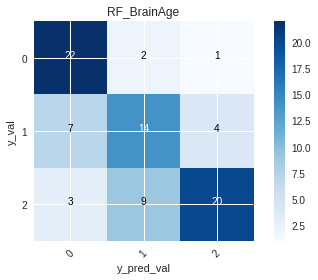

In [0]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred_val)

np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, [0,1,2])

## Permutation importance

In [0]:
!pip install -q eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf2, random_state=42).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Weight,Feature
0.0561 ± 0.0365,Left-choroid-plexus
0.0439 ± 0.0249,rh_frontalpole_volume
0.0415 ± 0.0548,Left-Lateral-Ventricle
0.0366 ± 0.0218,rh_parstriangularis_volume
0.0317 ± 0.0396,Right-Lateral-Ventricle
0.0293 ± 0.0195,rh_posteriorcingulate_volume
0.0293 ± 0.0119,rh_rostralanteriorcingulate_volume
0.0293 ± 0.0331,rh_superiortemporal_volume
0.0293 ± 0.0331,rh_lateraloccipital_volume
0.0293 ± 0.0119,Left-Putamen


In [0]:
perm1 = PermutationImportance(rf3, random_state=42).fit(X2_exp_val, y2_exp_val)
eli5.show_weights(perm1, feature_names = X2_exp_val.columns.tolist())

Weight,Feature
0.0463 ± 0.0324,rh_parstriangularis_volume
0.0366 ± 0.0267,rh_rostralmiddlefrontal_volume
0.0268 ± 0.0183,lh_superiorfrontal_volume
0.0268 ± 0.0284,rh_superiortemporal_volume
0.0268 ± 0.0098,Left-Thalamus-Proper
0.0244 ± 0.0218,rh_precentral_volume
0.0244 ± 0.0154,lh_rostralmiddlefrontal_volume
0.0244 ± 0.0154,lh_parsopercularis_volume
0.0244 ± 0.0154,Left-Lateral-Ventricle
0.0220 ± 0.0239,rh_superiorfrontal_volume
